In [489]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [490]:
# Reading the file
df = pd.read_csv('Real Estate Data V21.csv')

In [491]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [492]:
df.shape

(14528, 9)

In [493]:
df.dtypes

Name               object
Property Title     object
Price              object
Location           object
Total_Area          int64
Price_per_SQFT    float64
Description        object
Baths               int64
Balcony            object
dtype: object

In [494]:
# Changing the data types

df['Name'] = df['Name'].astype('string')
df['Property Title'] = df['Property Title'].astype('string')
df['Location'] = df['Location'].astype('string')
df['Description'] = df['Description'].astype('string')
df['Balcony'] = df['Balcony'].astype('string')
df['Total_Area'] = df['Total_Area'].astype('string')

In [495]:
# Dropping duplicate properties

df['Property'] = df['Name'] + df['Property Title'] + df['Total_Area']
df.drop_duplicates(['Property'],inplace=True)

In [496]:
df.shape

(13949, 10)

In [498]:
# Checking for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Property Title - 0%
Price - 0%
Location - 0%
Total_Area - 0%
Price_per_SQFT - 0%
Description - 0%
Baths - 0%
Balcony - 0%
Property - 0%


In [499]:
# Create Type of property and City features

def get_nth_word(title,N):
    if N==-1:
        res = title.split(',')[-1]
    else:
        res = title.split(' ')[N-1]
    return res

df['Type of property'] = df['Property Title'].apply(get_nth_word,args=([3]))
df['City'] = df['Location'].apply(get_nth_word,args=([-1]))

In [500]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Property,Type of property,City
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Casagrand ECR 144 BHK Flat for sale in Kanathu...,Flat,Chennai
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,"Ramanathan Nagar, Pozhichalur,Chennai10 BHK In...",Independent,Chennai
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,DAC Prapthi3 BHK Flat for sale in West Tambara...,Flat,Chennai
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,"Naveenilaya,Chepauk, Triplicane,Chennai7 BHK I...",Independent,Chennai
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,VGN Spring Field Phase 12 BHK Flat for sale in...,Flat,Chennai


In [501]:
df['City'].unique()

array([' Chennai', 'Chennai', 'Bangalore', ' Bangalore', 'Hyderabad',
       ' Hyderabad', 'Mumbai', ' Mumbai', 'Thane', 'Kolkata', ' Kolkata',
       'Pune', ' Pune', ' New Delhi', 'New Delhi'], dtype=object)

In [502]:
# Performing data cleaning on City feature

df['City'] = df['City'].astype('string')
df['City'] = df['City'].replace([' Chennai',' Bangalore',' Hyderabad',' Mumbai',' Kolkata',' Pune',' New Delhi'],['Chennai','Bangalore','Hyderabad','Mumbai','Kolkata','Pune','New Delhi'])

In [503]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Property,Type of property,City
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Casagrand ECR 144 BHK Flat for sale in Kanathu...,Flat,Chennai
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,"Ramanathan Nagar, Pozhichalur,Chennai10 BHK In...",Independent,Chennai
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,DAC Prapthi3 BHK Flat for sale in West Tambara...,Flat,Chennai
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,"Naveenilaya,Chepauk, Triplicane,Chennai7 BHK I...",Independent,Chennai
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,VGN Spring Field Phase 12 BHK Flat for sale in...,Flat,Chennai


In [504]:
df.describe()

,Price_per_SQFT,Baths
count,13949.000000,13949.000000
mean,11749.205678,2.746218
std,48857.617074,0.899989
min,0.000000,1.000000
25%,4500.000000,2.000000
50%,6080.000000,3.000000
75%,9380.000000,3.000000
max,999000.000000,6.000000


In [505]:
df[df['Price_per_SQFT']==0]

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Property,Type of property,City
4277,"Magadi, Bangalore","4 BHK Independent House for sale in Magadi, Ba...",₹2.0,"Magadi, Bangalore",3000,0.0,"4 BHK Independent House for sale in Magadi, Be...",5,Yes,"Magadi, Bangalore4 BHK Independent House for s...",Independent,Bangalore
5856,"Srinivasa Nagar, Bangalore",3 BHK Independent House for sale in Srinivasa ...,₹3.0,"Srinivasa Nagar, Bangalore",2800,0.0,Best 3 BHK Independent House for modern-day li...,4,Yes,"Srinivasa Nagar, Bangalore3 BHK Independent Ho...",Independent,Bangalore
7948,Unique Tower by Unique Construction Mumbai,2 BHK Independent House for sale in Mumbai Cen...,₹1.0,"Mumbai Central, Mumbai",1800,0.0,Check out this 2 BHK Independent House for sal...,3,Yes,Unique Tower by Unique Construction Mumbai2 BH...,Independent,Mumbai


In [506]:
df['Price'] = df['Price'].astype('string')

In [507]:
df['Price'] = df['Price'].replace(['₹2.0','₹3.0','₹1.0'],['₹2.0 Cr','₹1.0 Cr','₹1.0 Cr'])

In [508]:
# Some sort of anamoly in Price_per_SQFT. So calculate correct price per sqft
# Convert Price column to Price in lakhs
from re import sub

def price_to_float(col):
    if col.endswith('Cr'):
        col = sub(r'[^\d.]', '', col)
        col = float(col.strip('Cr'))*100
        
    elif (col.endswith('L') or col.endswith('Lacs')):
        col = sub(r'[^\d.]', '', col)
        col = float(col.strip('L'))
    else:
        col = sub(r'[^\d.]', '', col)
        col = float(col)/1000
    return col 

df['Price in Lakhs'] = df['Price'].apply(price_to_float)

In [509]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,Property,Type of property,City,Price in Lakhs
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Casagrand ECR 144 BHK Flat for sale in Kanathu...,Flat,Chennai,199.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,"Ramanathan Nagar, Pozhichalur,Chennai10 BHK In...",Independent,Chennai,225.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,DAC Prapthi3 BHK Flat for sale in West Tambara...,Flat,Chennai,100.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,"Naveenilaya,Chepauk, Triplicane,Chennai7 BHK I...",Independent,Chennai,333.0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,VGN Spring Field Phase 12 BHK Flat for sale in...,Flat,Chennai,48.0


In [510]:
# Calculating correct price per sqft
df['Total_Area'] = df['Total_Area'].astype('float')
df.drop('Price_per_SQFT',inplace=True,axis=1)
df['Price_per_Sqft'] = round((df['Price in Lakhs']/df['Total_Area']) * 100000)

In [511]:
df.head()

,Name,Property Title,Price,Location,Total_Area,Description,Baths,Balcony,Property,Type of property,City,Price in Lakhs,Price_per_Sqft
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,Casagrand ECR 144 BHK Flat for sale in Kanathu...,Flat,Chennai,199.0,7704.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000.0,Looking for a 10 BHK Independent House for sal...,6,Yes,"Ramanathan Nagar, Pozhichalur,Chennai10 BHK In...",Independent,Chennai,225.0,3214.0
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,DAC Prapthi3 BHK Flat for sale in West Tambara...,Flat,Chennai,100.0,7576.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250.0,Entire Building for sale with 7 units of singl...,5,Yes,"Naveenilaya,Chepauk, Triplicane,Chennai7 BHK I...",Independent,Chennai,333.0,7835.0
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,VGN Spring Field Phase 12 BHK Flat for sale in...,Flat,Chennai,48.0,5000.0


In [512]:
# Seperating properties of type flat
df_flat = df[df['Type of property'] == 'Flat']

In [513]:
df_flat.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Total_Area,Baths,Price in Lakhs,Price_per_Sqft
count,9269.00,9269.00,9269.00,9269.00
mean,1002.30,2.61,80.25,7927.24
std,612.79,0.70,99.81,8720.36
min,100.00,1.00,1.00,183.00
25%,625.00,2.00,35.00,4498.00
50%,915.00,3.00,55.00,5870.00
75%,1200.00,3.00,88.00,8511.00
max,15000.00,6.00,3500.00,569106.00


In [514]:
df_flat.shape

(9269, 13)

<AxesSubplot:title={'center':'Price per SQFT (flats) vs City'}, xlabel='City', ylabel='Price_per_Sqft'>

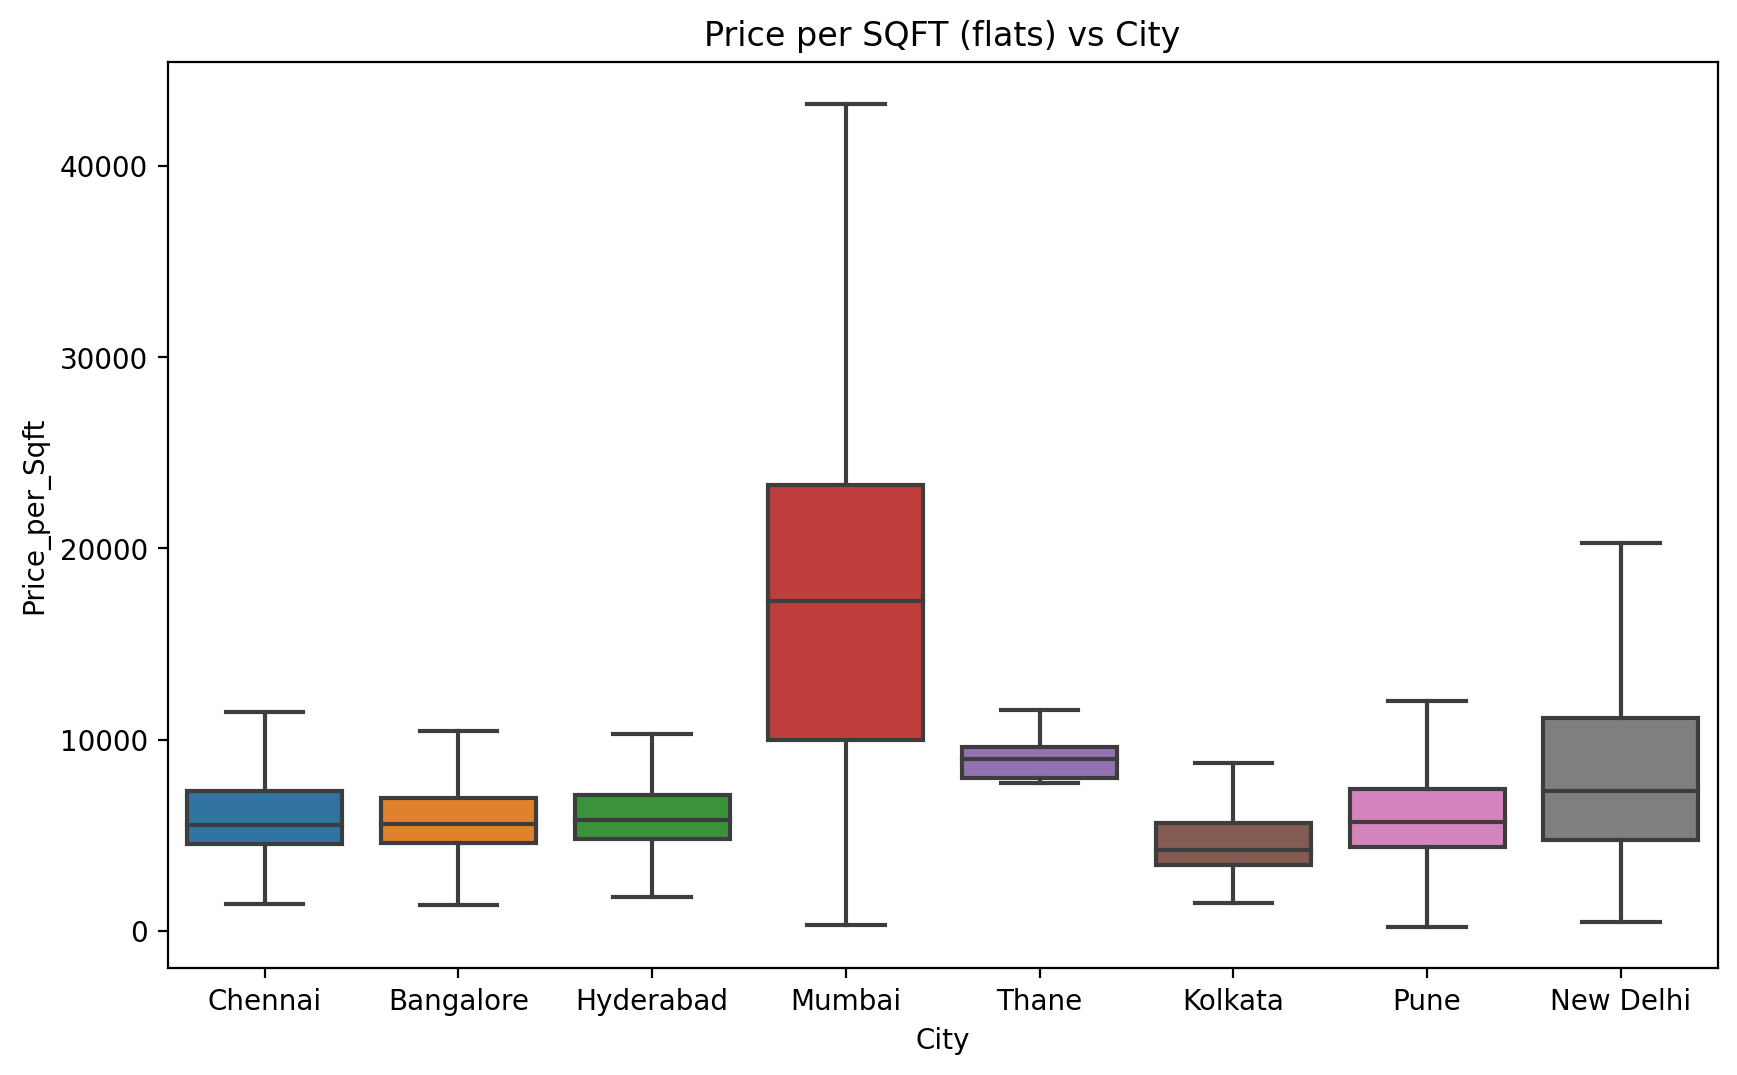

In [542]:
# Plotting boxplot on flat data

plt.figure(figsize=(10,6),dpi=200)
plt.xlabel("City")
plt.xlabel("Price per SQFT")
plt.title("Price per SQFT (flats) vs City")
sns.boxplot(data=df_flat,x='City',y='Price_per_Sqft',showfliers=False)

## Observations
1. The median of price per sqft is much higher in Mumbai compared to other cities.
2. Also the boxplot of Mumbai is more spread out when compared to other cities which are comparitively tighter. This indicates Mumbai has wider range of values of price per sqft when compared to other cities. 

In [543]:
median_value = df_flat.groupby("City").Price_per_Sqft.median()

In [544]:
print(median_value)

City
Bangalore     5571.0
Chennai       5550.0
Hyderabad     5774.5
Kolkata       4211.0
Mumbai       17273.0
New Delhi     7301.0
Pune          5714.0
Thane         9006.0
Name: Price_per_Sqft, dtype: float64
